# NY CitiBike Analysis: Rides vs Weather Plots

## Import Libraries and Load Data

In [1]:
# Import libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt
import matplotlib

In [2]:
# Load data
df = pd.read_csv('new_york_data.csv', index_col = 0)

/var/folders/4n/51fny6wj15lbcvykgf0dns700000gn/T/ipykernel_2304/2460435638.py:2: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('new_york_data.csv', index_col = 0)


In [3]:
df.shape

(30689921, 17)

In [4]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp,value,bike_rides_daily
0,DF208007EE5F9D79,classic_bike,2022-08-26 15:21:44,2022-08-26 15:34:20,Berkeley Pl & 6 Ave,4134.06,Windsor Pl & 8 Ave,3620.02,40.676530,-73.978469,40.660906,-73.983074,member,2022-08-26,27.4,1,111955
1,4BF322F1E0D74152,classic_bike,2022-08-26 16:08:53,2022-08-26 16:17:48,W 44 St & 11 Ave,6756.05,8 Ave & W 33 St,6450.12,40.762009,-73.996975,40.751551,-73.993934,member,2022-08-26,27.4,1,111955
2,301E3D811B0D5219,classic_bike,2022-08-26 02:34:33,2022-08-26 08:29:41,9 Ave & W 45 St,6717.06,8 Ave & W 33 St,6450.12,40.760193,-73.991255,40.751551,-73.993934,member,2022-08-26,27.4,1,111955
3,7D4E20D0A43FCE1F,classic_bike,2022-08-26 11:25:26,2022-08-26 11:52:19,Central Ave & Covert St,4550.05,DeKalb Ave & Hudson Ave,4513.06,40.689290,-73.909510,40.689888,-73.981013,casual,2022-08-26,27.4,1,111955
4,BB560C341D35EB7D,electric_bike,2022-08-26 19:46:08,2022-08-26 19:48:11,21 St & 43 Ave,6395.01,9 St & 44 Rd,6361.03,40.750525,-73.945948,40.749660,-73.952100,member,2022-08-26,27.4,1,111955


## Temperatures Plot

In [5]:
# Check date data type
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
date                   object
avgTemp               float64
value                   int64
bike_rides_daily        int64
dtype: object

In [6]:
# Change to type datetime
df['date'] = pd.to_datetime(df['date'])

In [7]:
df.dtypes

ride_id                       object
rideable_type                 object
started_at                    object
ended_at                      object
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
date                  datetime64[ns]
avgTemp                      float64
value                          int64
bike_rides_daily               int64
dtype: object

In [8]:
# Create dataframe where date is the index
df_temp = df.set_index('date')

In [9]:
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,value,bike_rides_daily
date,,,,,,,,,,,,,,,,
2022-08-26,DF208007EE5F9D79,classic_bike,2022-08-26 15:21:44,2022-08-26 15:34:20,Berkeley Pl & 6 Ave,4134.06,Windsor Pl & 8 Ave,3620.02,40.676530,-73.978469,40.660906,-73.983074,member,27.4,1,111955
2022-08-26,4BF322F1E0D74152,classic_bike,2022-08-26 16:08:53,2022-08-26 16:17:48,W 44 St & 11 Ave,6756.05,8 Ave & W 33 St,6450.12,40.762009,-73.996975,40.751551,-73.993934,member,27.4,1,111955
2022-08-26,301E3D811B0D5219,classic_bike,2022-08-26 02:34:33,2022-08-26 08:29:41,9 Ave & W 45 St,6717.06,8 Ave & W 33 St,6450.12,40.760193,-73.991255,40.751551,-73.993934,member,27.4,1,111955
2022-08-26,7D4E20D0A43FCE1F,classic_bike,2022-08-26 11:25:26,2022-08-26 11:52:19,Central Ave & Covert St,4550.05,DeKalb Ave & Hudson Ave,4513.06,40.689290,-73.909510,40.689888,-73.981013,casual,27.4,1,111955
2022-08-26,BB560C341D35EB7D,electric_bike,2022-08-26 19:46:08,2022-08-26 19:48:11,21 St & 43 Ave,6395.01,9 St & 44 Rd,6361.03,40.750525,-73.945948,40.749660,-73.952100,member,27.4,1,111955


<Axes: xlabel='date'>

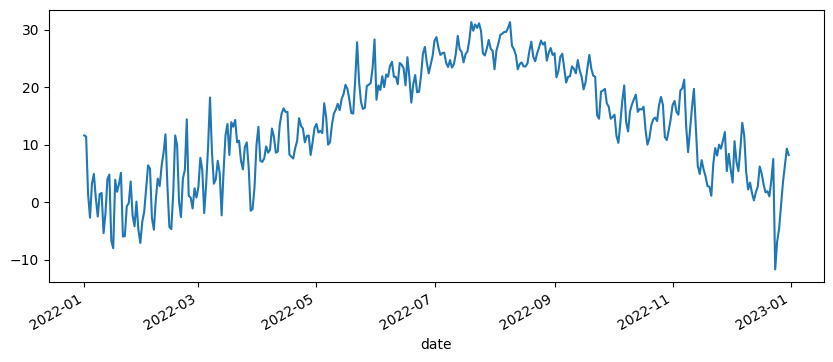

In [10]:
# Plot temperatures using pandas
plt.figure(figsize = (10,4))
df_temp['avgTemp'].plot()

## Create bike_rides_daily Column

In [11]:
# Group by the count of the trips each day
df_group = pd.DataFrame(df.groupby(['date'])['ride_id'].count()).reset_index()

In [12]:
df_group.head()

,date,ride_id
0,2022-01-01,20895
1,2022-01-02,44234
2,2022-01-03,34126
3,2022-01-04,37879
4,2022-01-05,35080


In [13]:
# Rename columns
df_group.rename(columns = {'ride_id':'bike_rides_daily'}, inplace = True)

In [14]:
# Merge with df
df = df.merge(df_group, on = 'date', how = 'outer', indicator = True)

In [15]:
# Check
print("Shape of January 1st is", df[df['date'] == '2018-01-01'].shape) # Check 
print("Shape of January 2nd is", df[df['date'] == '2018-01-02'].shape) # Second check 

Shape of January 1st is (0, 17)
Shape of January 2nd is (0, 17)


In [16]:
# Remove _merge column
df.drop(columns = {'_merge'}, inplace = True)

In [17]:
# Create dataframe where date is the index
df_temp = df.set_index('date')

In [18]:
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,bike_rides_daily
date,,,,,,,,,,,,,,,
2022-01-01,F2147CAB2E003A12,classic_bike,2022-01-01 00:56:36,2022-01-01 01:06:55,Cedar St & Evergreen Ave,4721.01,Willoughby Ave & Tompkins Ave,4665.02,40.696710,-73.928070,40.694254,-73.946269,member,11.6,20895
2022-01-01,27FF7FCE0F8A02DF,classic_bike,2022-01-01 15:42:26,2022-01-01 16:02:59,Albany St & Greenwich St,5145.02,Bayard St & Baxter St,5351.03,40.709267,-74.013247,40.716021,-73.999744,casual,11.6,20895
2022-01-01,E413BC1D0B4C6031,classic_bike,2022-01-01 15:37:55,2022-01-01 16:03:05,Albany St & Greenwich St,5145.02,Bayard St & Baxter St,5351.03,40.709267,-74.013247,40.716021,-73.999744,casual,11.6,20895
2022-01-01,1967ADD90811CE78,electric_bike,2022-01-01 17:35:23,2022-01-01 17:46:05,Cabrini Blvd & W 177 St,8358.1,Broadway & W 220 St,8715.01,40.848282,-73.941343,40.872412,-73.912807,member,11.6,20895
2022-01-01,D199C729356BA836,classic_bike,2022-01-01 19:25:20,2022-01-01 19:41:53,5 Ave & E 72 St,7100.07,W 41 St & 8 Ave,6602.03,40.772828,-73.966853,40.756405,-73.990026,casual,11.6,20895


## Temperatures and Bike Rides Plot

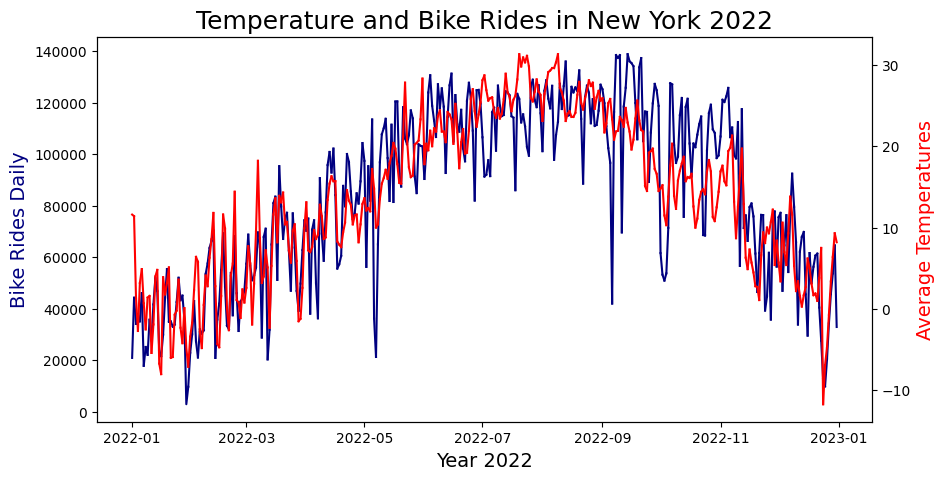

In [19]:
# Create figure and axis objects with subplots() and details
fig,ax = plt.subplots(figsize = (10, 5))

# Make a plot of the bike rides
ax.plot(df_temp['bike_rides_daily'], color = 'navy')
ax.set_xlabel('Year 2022', fontsize = 14) # set x-axis label
ax.set_ylabel('Bike Rides Daily', color = 'navy', fontsize = 14) # set y-axis label

# Create the dual axis - initialize a twin object for two different y-axis on the sample plot
ax2 = ax.twinx()

# Make a plot of the temperatues on the y-axis using second axis object
ax2.plot(df_temp["avgTemp"], color = 'red')
ax2.set_ylabel('Average Temperatures', color = 'red', fontsize = 14)

plt.title('Temperature and Bike Rides in New York 2022', fontsize = 18)
plt.show()

#### In the above graph I used matplotlib in an object oriented manner to plot the number of daily bike rides and average temperatures on the same figure. First I created figure and axis objects using subplot(). Then I plotted the bike rides using object ax. Next I created the dual axis (ax2) using twinx() and plotted the temperatures using object ax2. Lastly I added a title to the whole graph.